# K-Means Clustering

## What is K-Means Clustering?

**K-Means** is one of the most popular unsupervised machine learning algorithms used for clustering data into groups (clusters) based on similarity. It was first proposed by Stuart Lloyd in 1957 and partitions data into K distinct, non-overlapping clusters.

## Key Concepts:

1. **Unsupervised Learning**: K-Means works with unlabeled data to find hidden patterns and group similar data points

2. **Centroids**: The center point of each cluster, representing the mean position of all points assigned to that cluster

3. **Distance Metric**: Typically uses Euclidean distance to measure similarity between data points and centroids

4. **K Value**: The number of clusters to form, which must be specified before running the algorithm

5. **Iterative Process**: K-Means repeatedly refines cluster assignments until convergence

## How K-Means Works:

1. **Initialize**: Randomly select K points from the dataset as initial centroids (or use K-means++ for smarter initialization)
2. **Assignment Step**: Assign each data point to the nearest centroid based on distance
3. **Update Step**: Recalculate centroids as the mean of all points assigned to each cluster
4. **Repeat**: Continue steps 2-3 until centroids stop moving significantly (convergence) or maximum iterations reached
5. **Output**: Final cluster assignments and centroid positions

## Mathematical Intuition:

K-Means minimizes the within-cluster sum of squares (WCSS):
$$\text{WCSS} = \sum_{i=1}^{K} \sum_{x \in C_i} ||x - \mu_i||^2$$

Where:
- $K$ = number of clusters
- $C_i$ = cluster $i$
- $\mu_i$ = centroid of cluster $i$
- $x$ = data point

## Advantages:
- Simple and easy to understand and implement
- Computationally efficient and scales well to large datasets
- Guaranteed to converge (though not necessarily to global optimum)
- Works well when clusters are spherical and of similar size
- Fast for moderate number of clusters and features

## Disadvantages:
- Requires specifying K beforehand (number of clusters)
- Sensitive to initial centroid placement (can converge to local minima)
- Assumes clusters are spherical and equally sized
- Heavily affected by outliers
- Struggles with non-linear cluster boundaries
- Not suitable for clusters with varying densities

## Common Use Cases:
- Customer segmentation
- Image compression
- Document clustering
- Anomaly detection
- Market research

## Step 1: Import Required Libraries

In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Create Synthetic Dataset

We'll create a dataset with distinct clusters for demonstration.

Dataset shape: (500, 2)
Number of samples: 500
Number of features: 2


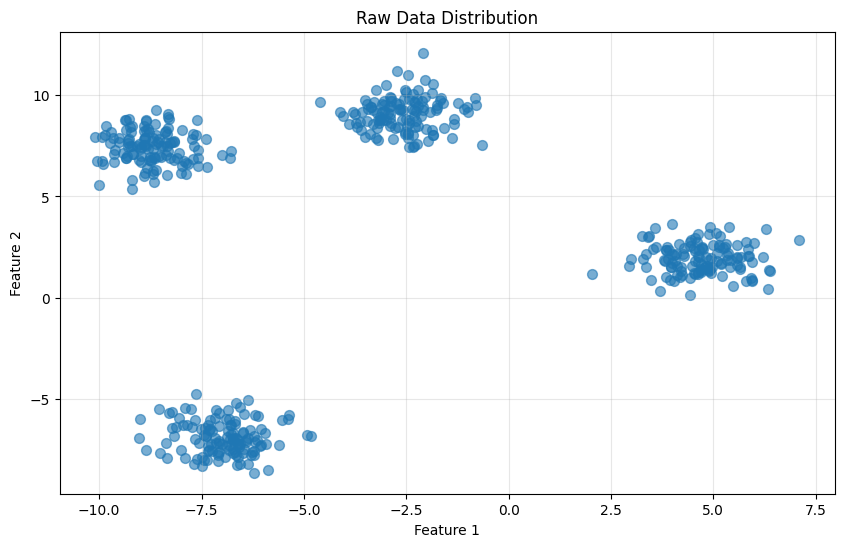

In [11]:
# Create synthetic dataset with 4 clusters
X, y_true = make_blobs(n_samples=500, centers=4, n_features=2, 
                       cluster_std=0.8, random_state=42)

print(f"Dataset shape: {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")

# Visualize the raw data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, s=50)
plt.title('Raw Data Distribution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)
plt.show()

## Step 3: Standardize the Data

Scaling is important for K-Means since it uses distance-based calculations.

In [12]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data standardized successfully!")
print(f"Mean of scaled data: {X_scaled.mean(axis=0)}")
print(f"Std of scaled data: {X_scaled.std(axis=0)}")

Data standardized successfully!
Mean of scaled data: [-8.81961171e-16 -1.59677827e-16]
Std of scaled data: [1. 1.]


## Step 4: Determine Optimal Number of Clusters (Elbow Method)

The Elbow Method helps identify the optimal K by plotting inertia (within-cluster sum of squares).

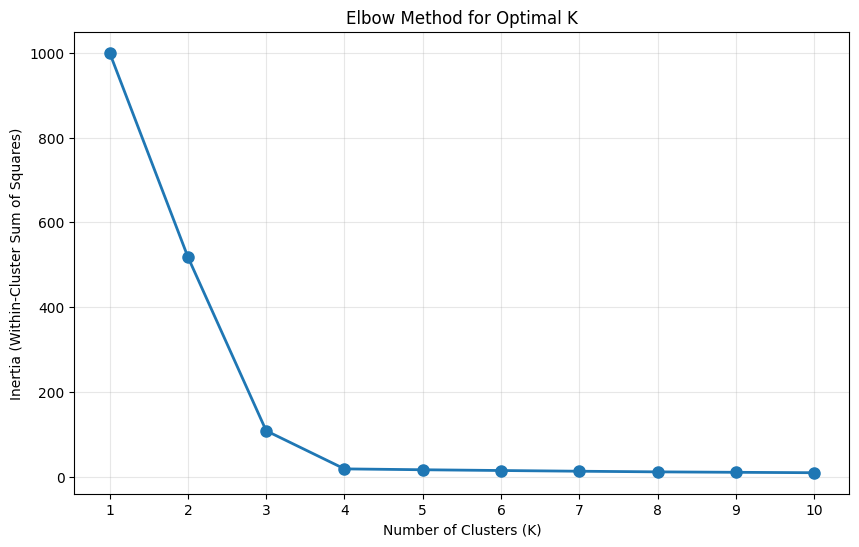

Look for the 'elbow' point where the decrease in inertia starts to slow down.


In [13]:
# Calculate inertia for different K values
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, marker='o', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.show()

print("Look for the 'elbow' point where the decrease in inertia starts to slow down.")

## Step 5: Apply K-Means Clustering

Based on the elbow method, we'll use K=4 clusters.

In [14]:
# Apply K-Means with K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X_scaled)

# Get cluster centers
centroids = kmeans.cluster_centers_

print(f"Number of clusters: {kmeans.n_clusters}")
print(f"Number of iterations: {kmeans.n_iter_}")
print(f"Inertia: {kmeans.inertia_:.2f}")
print(f"\nCluster sizes:")
for i in range(4):
    print(f"  Cluster {i}: {np.sum(y_pred == i)} points")

Number of clusters: 4
Number of iterations: 2
Inertia: 18.66

Cluster sizes:
  Cluster 0: 125 points
  Cluster 1: 125 points
  Cluster 2: 125 points
  Cluster 3: 125 points


## Step 6: Visualize Clusters

Let's visualize the clustered data with centroids.

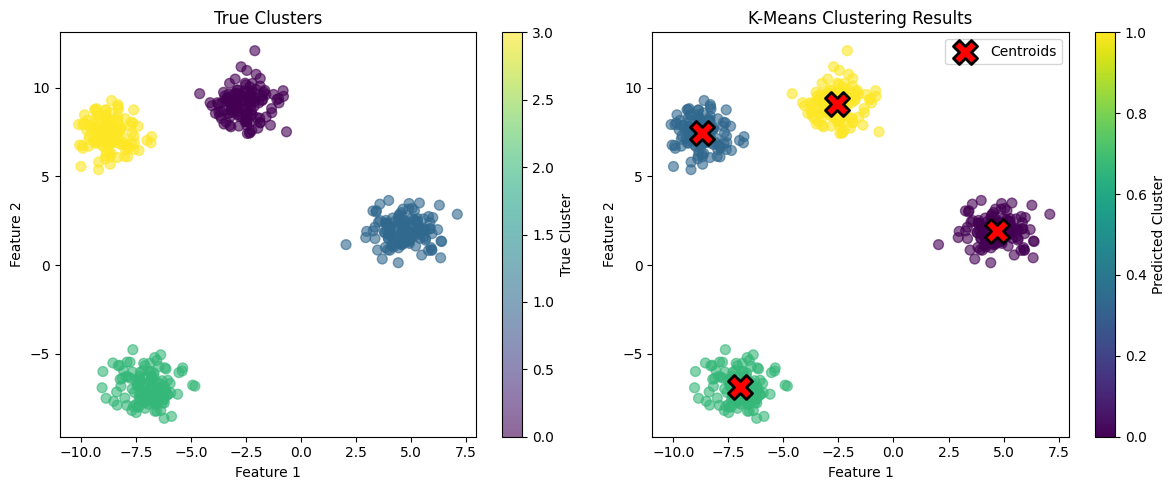

In [15]:
# Visualize clusters
plt.figure(figsize=(12, 5))

# Plot original data with true labels
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', alpha=0.6, s=50)
plt.title('True Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='True Cluster')

# Plot K-Means results
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.6, s=50)
# Plot centroids (transform back to original scale)
centroids_original = scaler.inverse_transform(centroids)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], 
           marker='X', s=300, c='red', edgecolors='black', linewidths=2, label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Predicted Cluster')
plt.legend()

plt.tight_layout()
plt.show()

## Step 7: Evaluate Clustering Performance

We'll use Silhouette Score and Davies-Bouldin Index to evaluate cluster quality.

In [16]:
# Calculate evaluation metrics
silhouette = silhouette_score(X_scaled, y_pred)
davies_bouldin = davies_bouldin_score(X_scaled, y_pred)

print("Clustering Evaluation Metrics:")
print("="*50)
print(f"Silhouette Score: {silhouette:.4f}")
print("  (Range: -1 to 1, higher is better)")
print(f"\nDavies-Bouldin Index: {davies_bouldin:.4f}")
print("  (Lower is better, 0 is perfect)")
print("="*50)

# Interpretation
if silhouette > 0.5:
    print("\n✓ Good clustering: Clear separation between clusters")
elif silhouette > 0.25:
    print("\n⚠ Moderate clustering: Some overlap between clusters")
else:
    print("\n✗ Poor clustering: Significant overlap or incorrect K")

Clustering Evaluation Metrics:
Silhouette Score: 0.8393
  (Range: -1 to 1, higher is better)

Davies-Bouldin Index: 0.2247
  (Lower is better, 0 is perfect)

✓ Good clustering: Clear separation between clusters


## Key Parameters in K-Means:

- **n_clusters**: Number of clusters to form (K)
- **init**: Method for initialization ('k-means++', 'random')
- **n_init**: Number of times to run with different centroid seeds
- **max_iter**: Maximum number of iterations for a single run
- **random_state**: Seed for reproducibility

## Tips for Using K-Means:

1. **Always scale your data** before applying K-Means
2. **Use Elbow Method** or Silhouette Score to find optimal K
3. **Run multiple times** (n_init) to avoid local minima
4. **Check cluster quality** using evaluation metrics
5. **Visualize results** when possible (2D/3D)

## Conclusion:

K-Means is a powerful clustering algorithm that:
- Groups similar data points together
- Works well with large datasets
- Is easy to understand and implement
- Requires careful selection of K

The algorithm's effectiveness depends on proper data preprocessing, choosing the right K, and evaluating results with appropriate metrics!